# **Wine Quality Binary Classification**

# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# **Data Loading and Overview**

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# **Data Preprocessing and Visualization**

In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


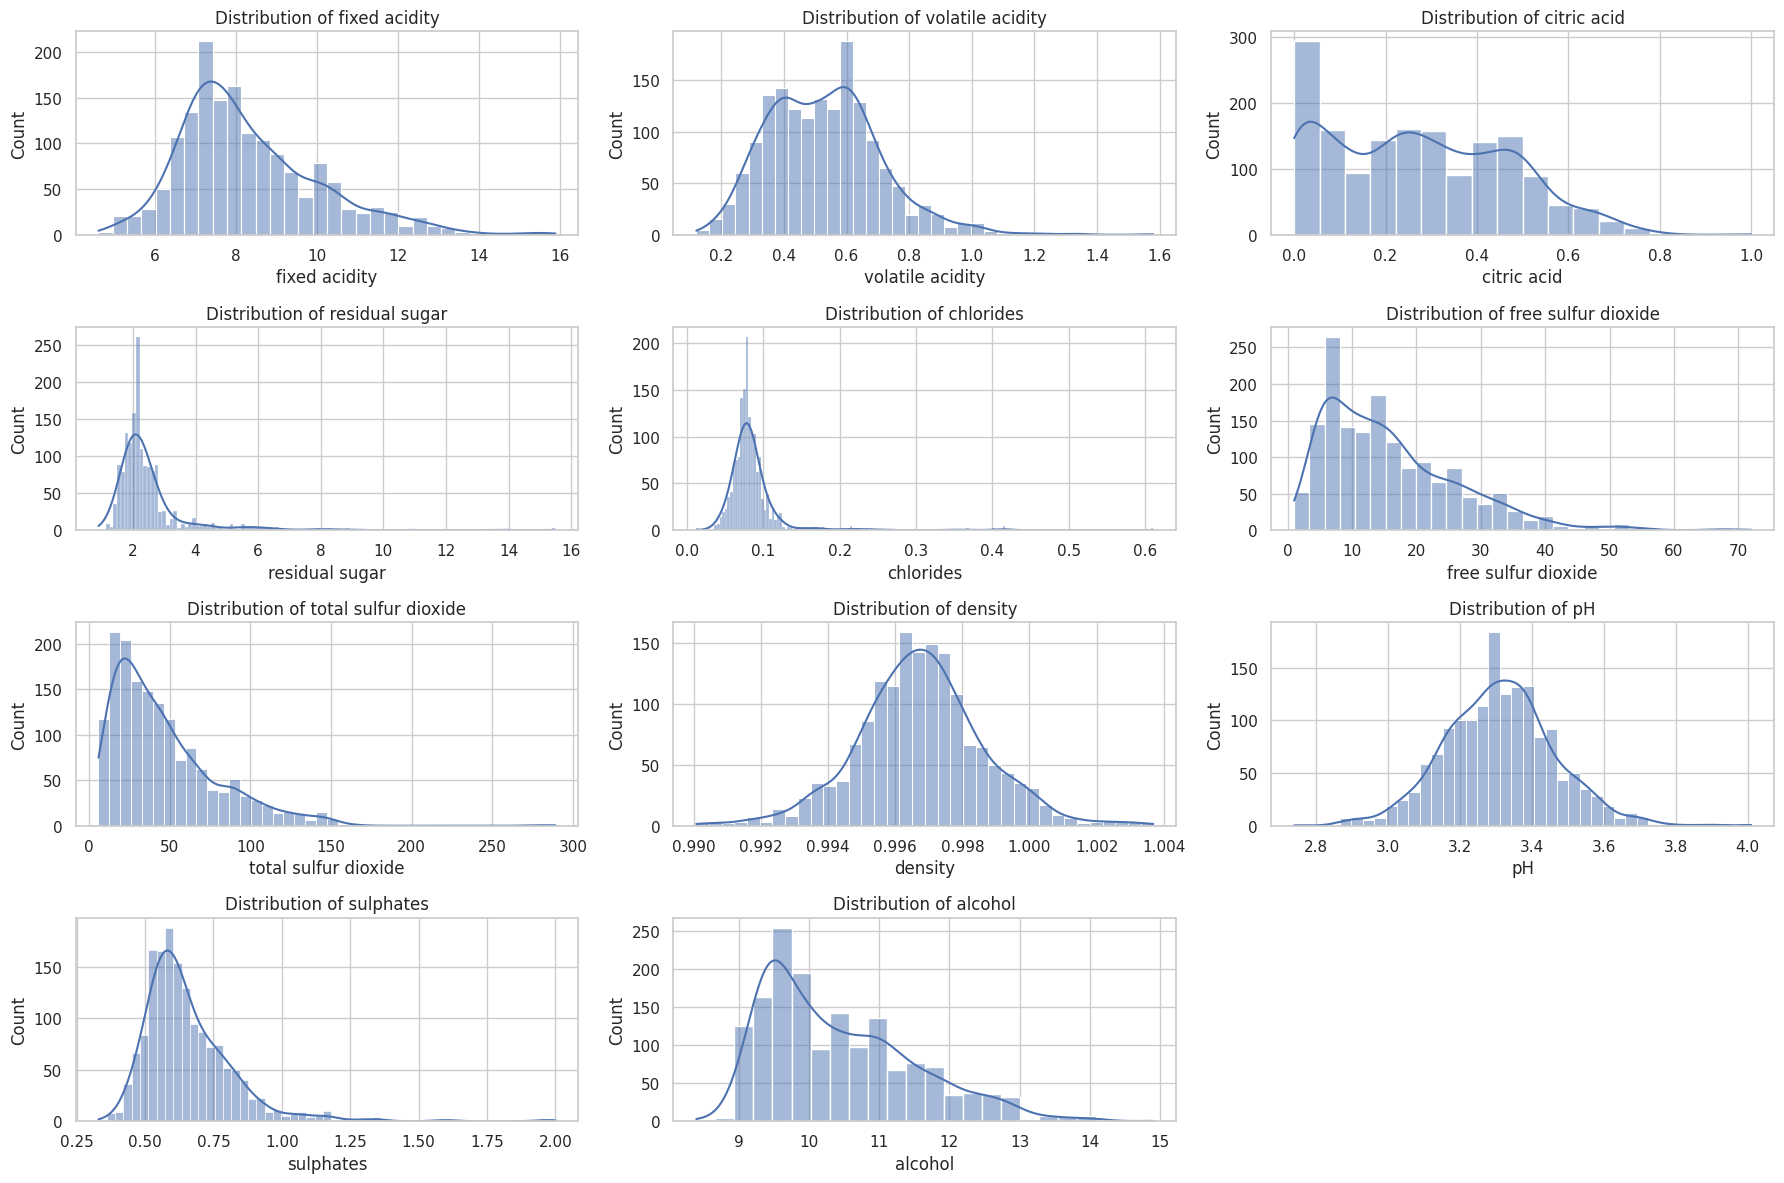

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


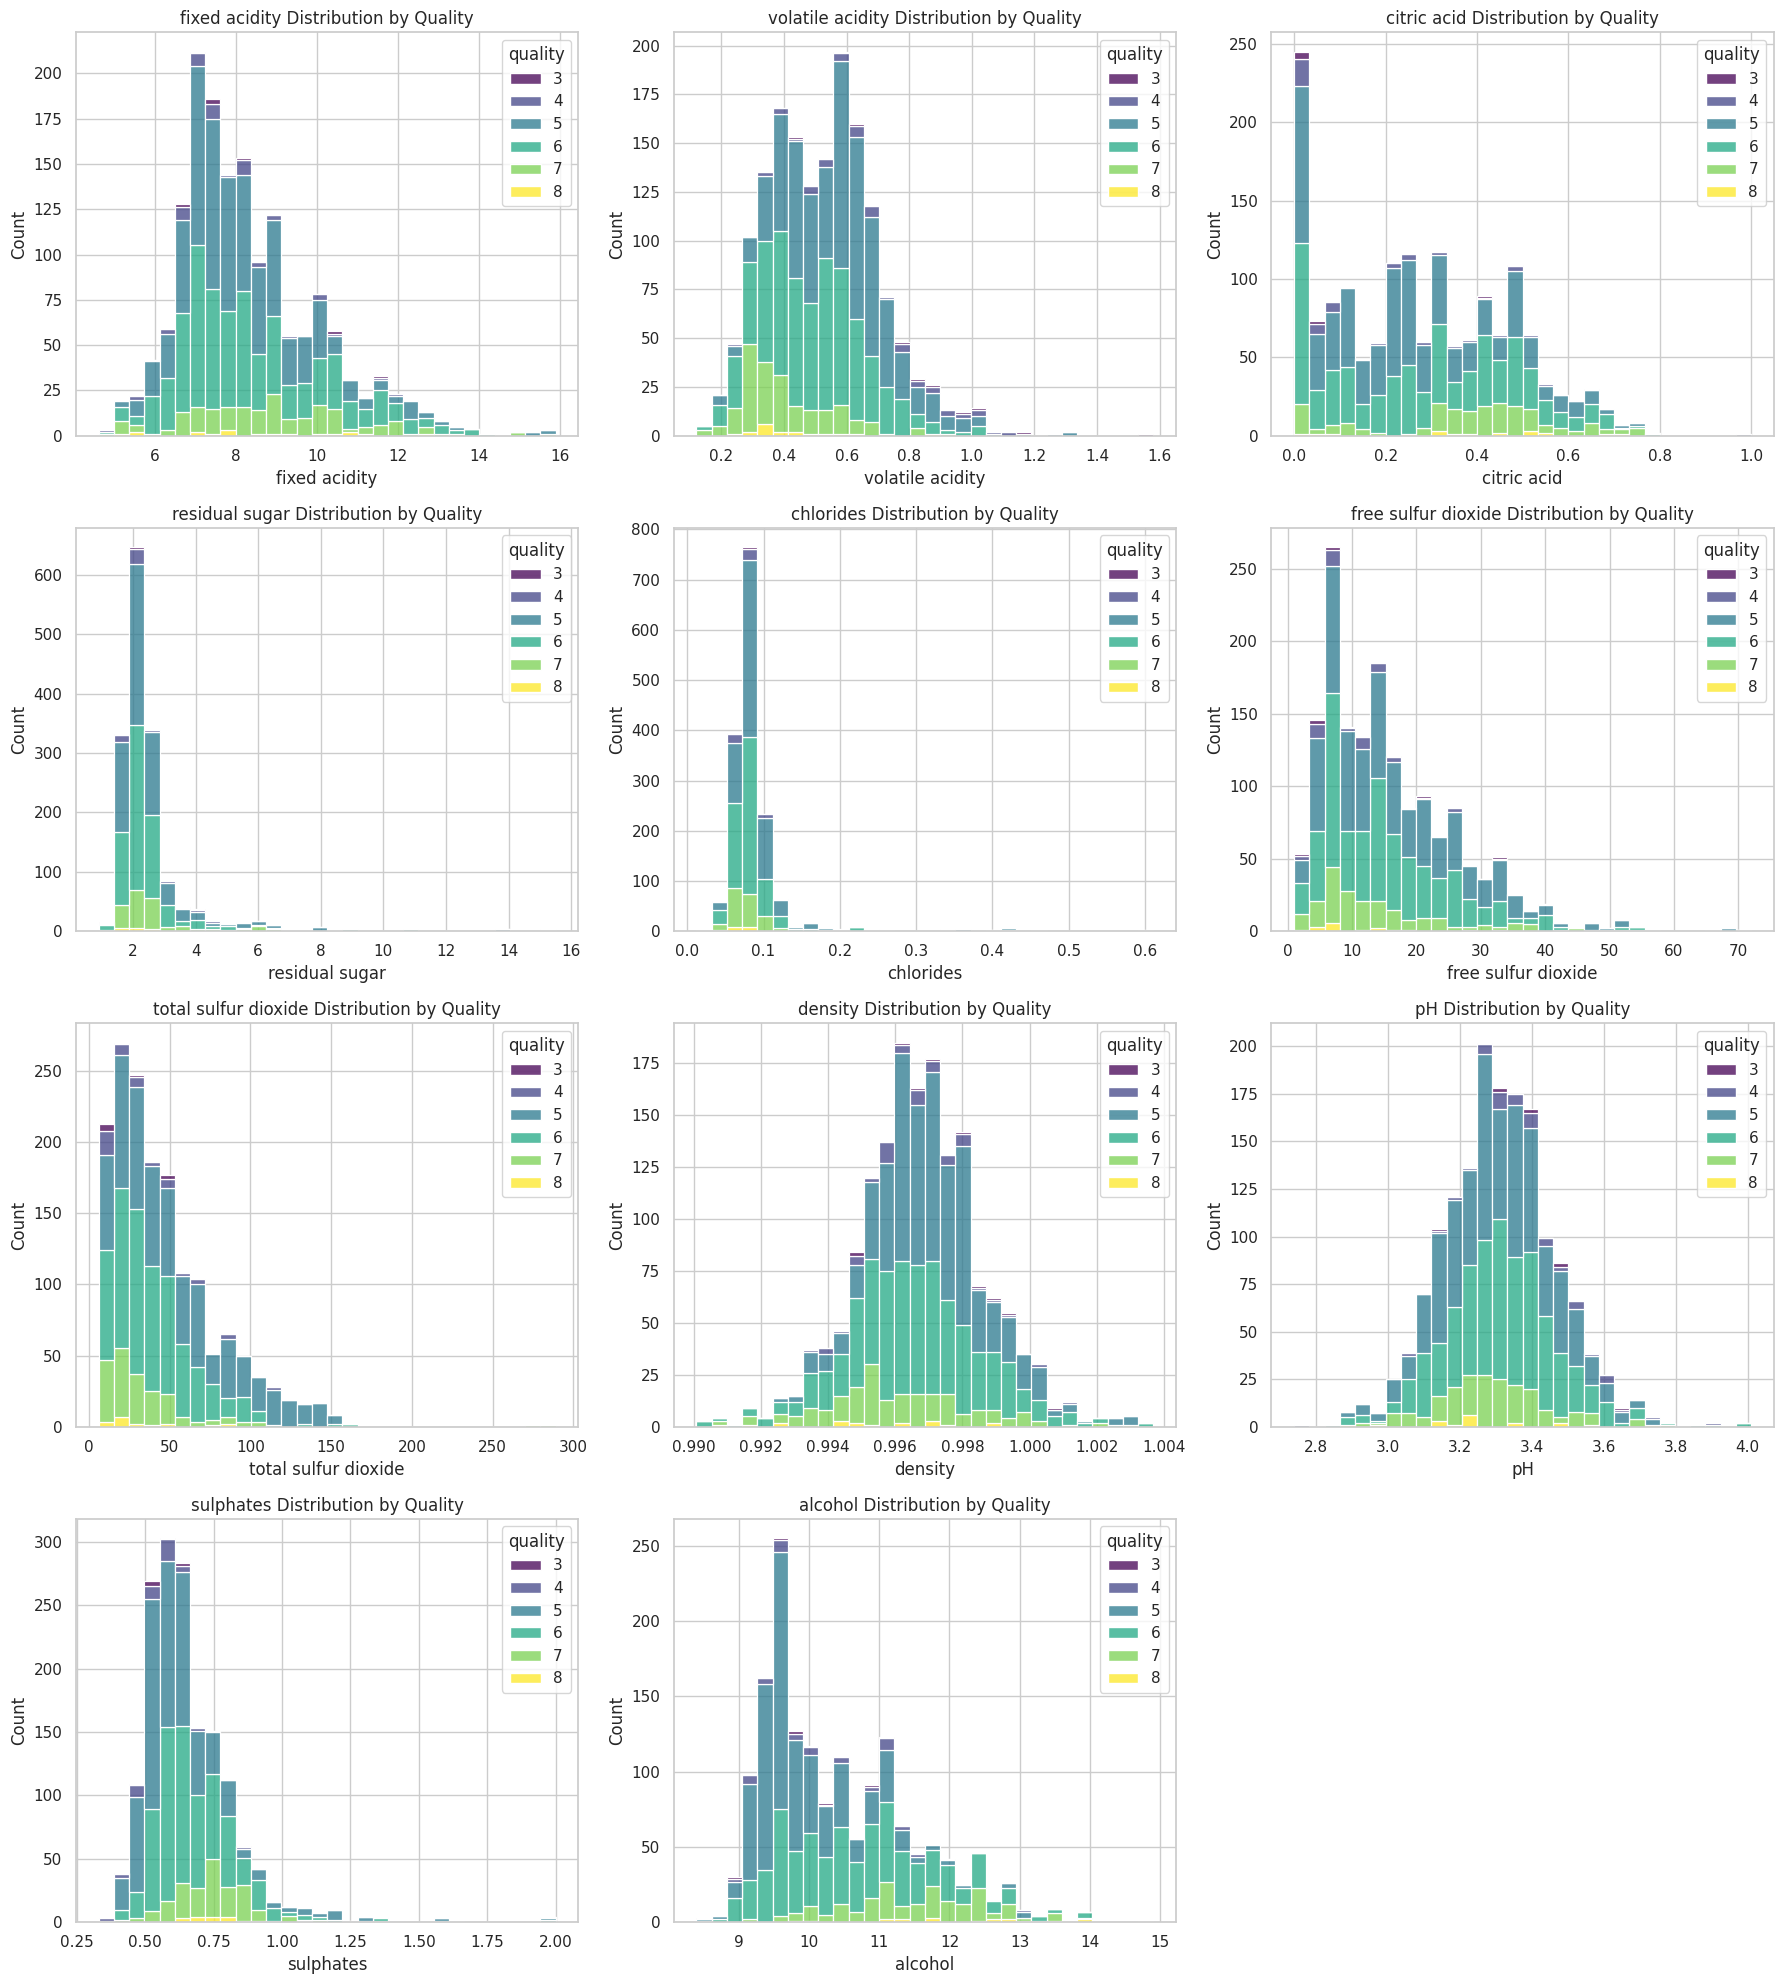

In [ ]:
plt.figure(figsize=(18, 20))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=col, hue='quality', multiple='stack', palette='viridis', bins=30)
    plt.title(f"{col} Distribution by Quality")

plt.tight_layout()
plt.show()


# **Feature Engineering**

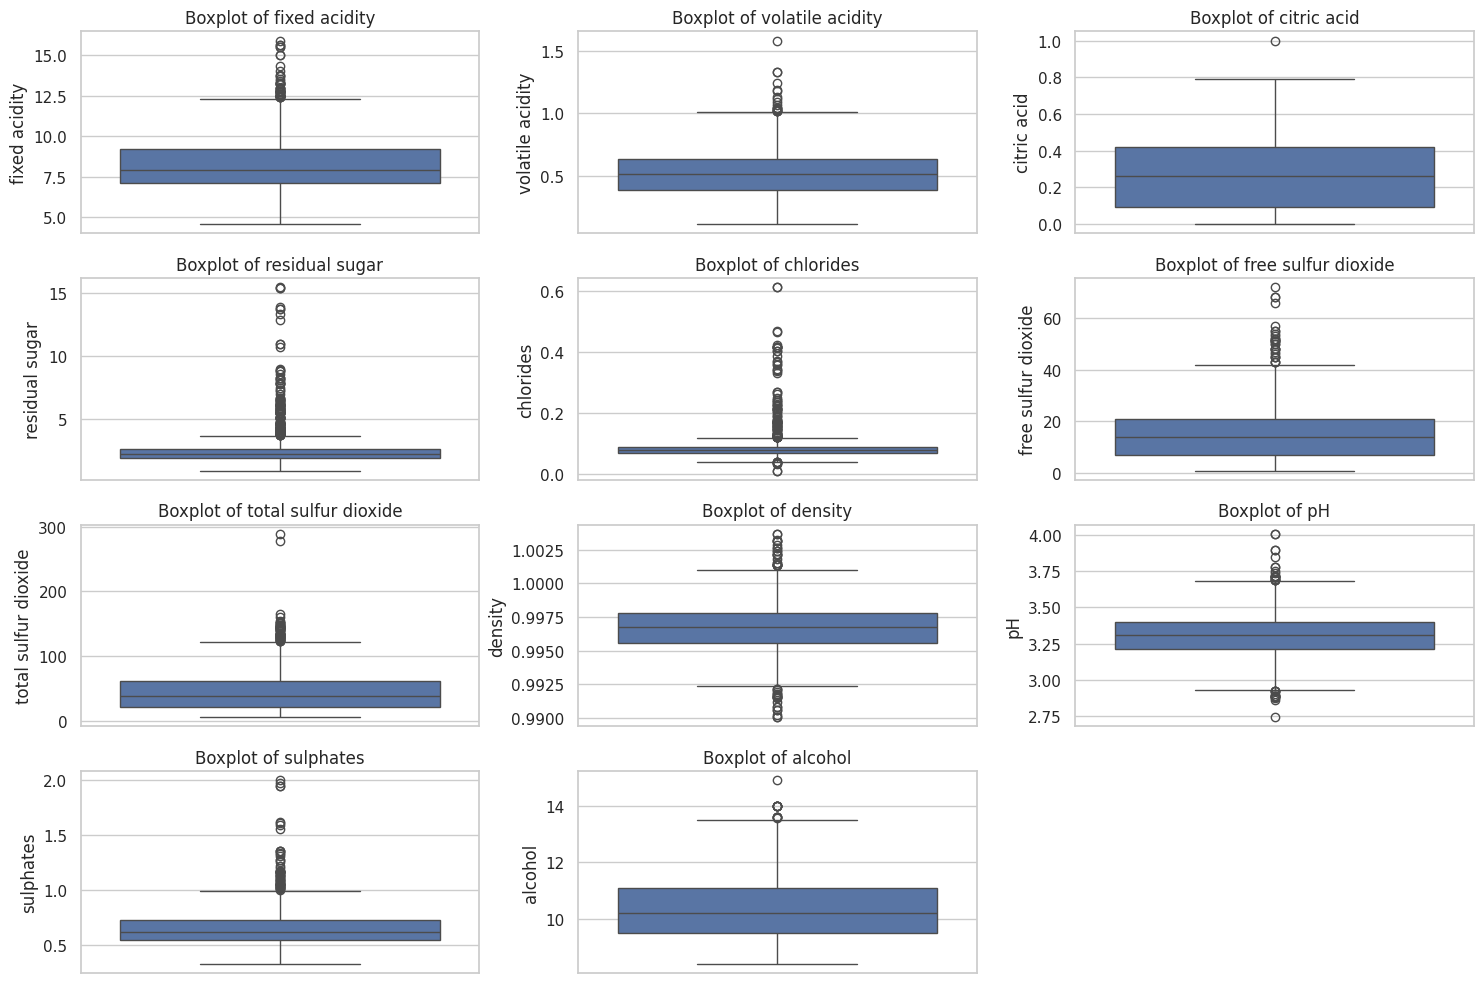

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
  plt.subplot(4, 3, i)
  sns.boxplot(df[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [ ]:
for col in df.columns[:-1]:  # exclude 'quality'
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)


In [ ]:
log_features = ['residual sugar', 'chlorides', 'sulphates', 'total sulfur dioxide']

for col in log_features:
    df[col] = np.log1p(df[col])  # log1p = log(1 + x) avoids log(0) error


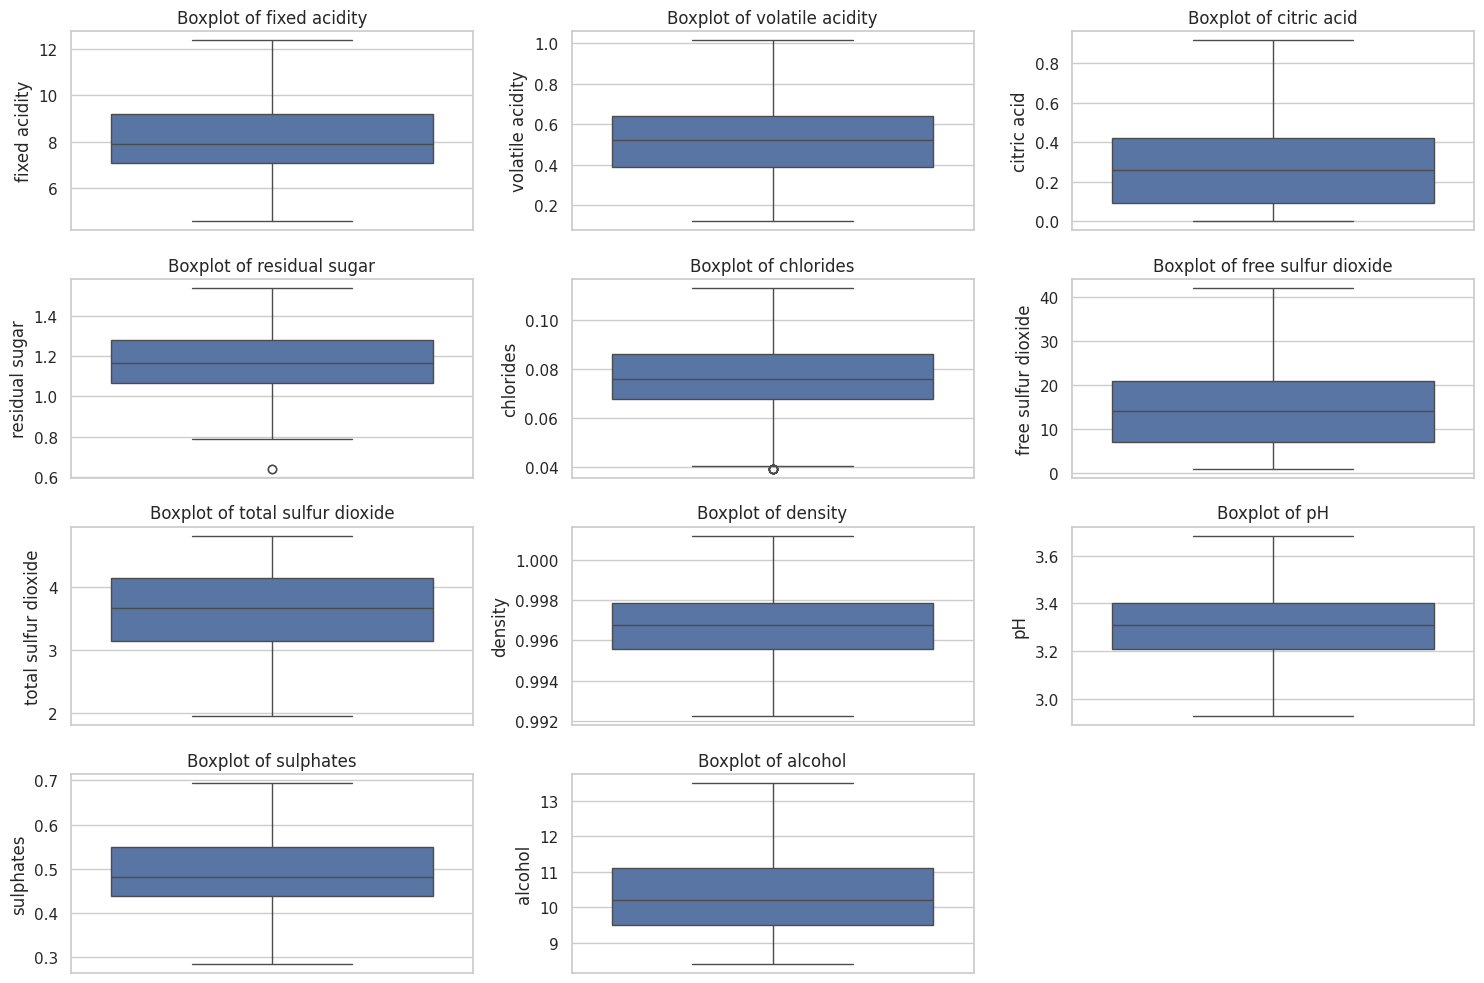

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
  plt.subplot(4, 3, i)
  sns.boxplot(df[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

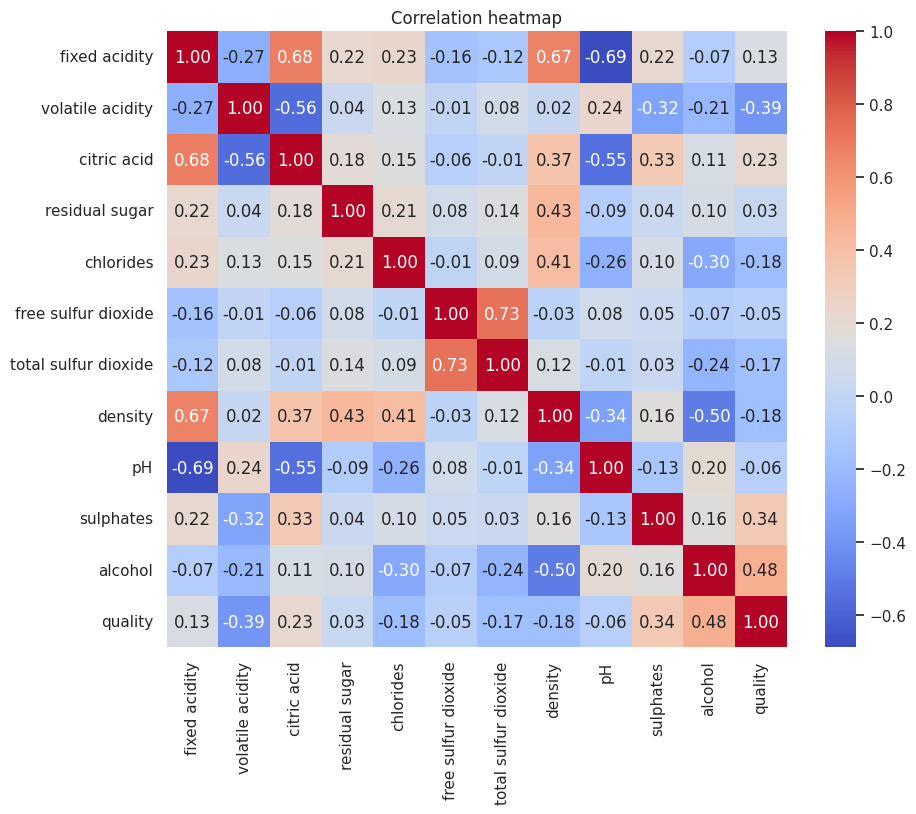

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation heatmap")
plt.show()

In [ ]:
df = df.drop('residual sugar', axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4,5
1,7.8,0.88,0.00,0.093490,25.0,4.219508,0.9968,3.20,0.518794,9.8,5
2,7.8,0.76,0.04,0.088011,15.0,4.007333,0.9970,3.26,0.500775,9.8,5
3,11.2,0.28,0.56,0.072321,17.0,4.110874,0.9980,3.16,0.457425,9.8,6
4,7.4,0.70,0.00,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4,5


In [ ]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
df['quality label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)


In [ ]:
df['quality label'].value_counts()

,count
quality label,
1,855
0,744


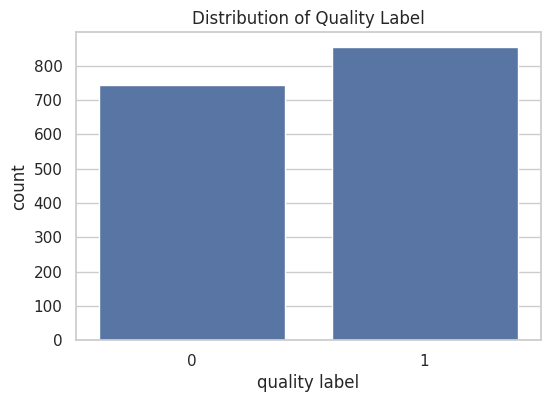

In [ ]:
plt.figure(figsize=(6, 4))

sns.countplot(x='quality label', data=df)

plt.title("Distribution of Quality Label")
plt.show()

In [ ]:
df = df.drop('quality', axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality label
0,7.4,0.70,0.00,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4,0
1,7.8,0.88,0.00,0.093490,25.0,4.219508,0.9968,3.20,0.518794,9.8,0
2,7.8,0.76,0.04,0.088011,15.0,4.007333,0.9970,3.26,0.500775,9.8,0
3,11.2,0.28,0.56,0.072321,17.0,4.110874,0.9980,3.16,0.457425,9.8,1
4,7.4,0.70,0.00,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4,0


# **Modeling and Evaluation**

In [ ]:
X = df.drop(['quality label'], axis=1)
y = df['quality label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

X_train_prediction = log_reg_model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("Training Data Accuracy:", training_data_accuracy)

X_test_prediction = log_reg_model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy:", test_data_accuracy)

Training Data Accuracy: 0.746677091477717
Test Data Accuracy: 0.734375


In [ ]:
cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[111  38]
 [ 47 124]]


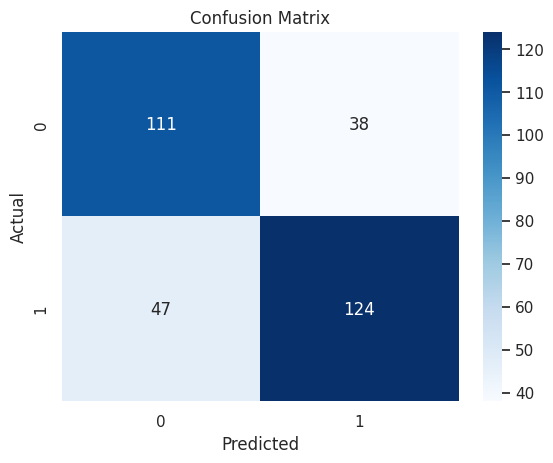

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       149
           1       0.77      0.73      0.74       171

    accuracy                           0.73       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.73      0.73       320

